### In average, what are the cheapest areas (PLZ / Postal code) one can live in Germany? 🤑 🇩🇪 🏠 
### Can we find some good deals close to the big cities?

Aerial footage shot by a drone flying over the city of Göppingen. Video courtesy of infodesignerin.

# 1 - Introduction

## 1.1 - Dataset Description

The data was scraped from Immoscout24, the biggest real estate platform in Germany. Immoscout24 has listings for both rental properties and homes for sale, however, the data only contains offers for rental properties.

**Content**

The data set contains most of the important properties, such as living area size, the rent, both base rent as well as total rent (if applicable), the location (street and house number, if available, ZIP code and state), type of energy etc. It also has two variables containing longer free text descriptions: description with a text describing the offer and facilities describing all available facilities, newest renovation etc.

## 1.2 - Dataset Dictionary

- **regio1:** Bundesland

- **serviceCharge:** Auxiliary costs such as electricty or internet [Euro]

- **heatingType:** Type of heating

- **telekomTvOffer:** Is payed TV included? If so, which offer?

- **telekomHybridUploadSpeed:** How fast is the hybrid inter upload speed?

- **newlyConst:** Is the building newly constructed?

- **balcony:** Does the object have a balcony?

- **picturecount:** How many pictures were uploaded to the listing?

- **pricetrend:** Price trend as calculated by Immoscout

- **telekomUploadSpeed:** How fast is the internet upload speed?

- **totalRent:** Total rent (usually a sum of base rent, service charge and heating cost)

- **yearConstructed:** Construction year

- **scoutId:** Immoscout Id

- **noParkSpaces:** Number of parking spaces

- **firingTypes:** Main energy sources, separated by colon

- **hasKitchen:** Has a kitchen

- **geo_bln:** Same as regio1

- **cellar:** Has a cellar

- **yearConstructedRange:** Binned construction year, 1 to 9

- **baseRent:** Base rent without electricity and heating

- **houseNumber:** House number

- **livingSpace:** Living space in sqm

- **geo_krs:** District, above ZIP code

- **condition:** Condition of the flat

- **interiorQual:** Interior quality

- **petsAllowed:** Are pets allowed, can be yes, no or negotiable

- **street:** Street name

- **streetPlain:** Street name (plain, different formating)

- **lift:** Is elevator available

- **baseRentRange:** Binned base rent, 1 to 9

- **typeOfFlat:** Type of flat

- **geo_plz:** ZIP code

- **noRooms:** Number of rooms

- **thermalChar:** Energy need in kWh/(m^2a), defines the energy efficiency class

- **floor:** Which floor is the flat on

- **numberOfFloors:** Number of floors in the building

- **noRoomsRange:** Binned number of rooms, 1 to 5

- **garden:** Has a garden

- **livingSpaceRange:** Binned living space, 1 to 7

- **regio2:** District or Kreis, same as geo krs

- **regio3:** City/town

- **description:** Free text description of the object

- **facilities:** Free text description about available facilities

- **heatingCosts:** Monthly heating costs in [Euro]

- **lastRefurbish:** Year of last renovation

- **date:** Time of scraping

# 2 - Development

Importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

Importing the dataframe:

In [2]:
db = pd.read_csv("./data/clean_immo_data.csv")

Importing the shapefile to the notebook

In [3]:
total_data = gpd.read_file("./map/plz-5stellig.shp")

In [4]:
total_data.head(10)

,plz,note,einwohner,qkm,geometry
0,81248,81248 MÃ¼nchen,121,1.984763,"POLYGON ((11.39468 48.14729, 11.3949 48.1478, ..."
1,60315,60315 Frankfurt am Main (FOUR),0,0.017481,"POLYGON ((8.67254 50.11264, 8.67259 50.11264, ..."
2,24988,24988 Oeversee,3350,36.491463,"POLYGON ((9.36586 54.69994, 9.36683 54.70014, ..."
3,93185,93185 Michelsneukirchen,1786,32.873844,"POLYGON ((12.47666 49.13598, 12.47702 49.13637..."
4,93489,93489 Schorndorf,2622,38.597260,"POLYGON ((12.54904 49.19318, 12.54953 49.19371..."
5,93494,93494 Waffenbrunn,2018,25.154035,"POLYGON ((12.62945 49.28007, 12.62949 49.28013..."
6,93473,93473 Arnschwang,1931,28.295340,"POLYGON ((12.76492 49.27279, 12.76496 49.27288..."
7,99331,99331 Geratal,4523,20.206691,"POLYGON ((10.79153 50.69477, 10.79178 50.69819..."
8,60312,60312 Frankfurt am Main (Omniturm),0,0.001829,"POLYGON ((8.67262 50.11164, 8.67311 50.11182, ..."
9,98694,98694 Ilmenau,7028,80.375011,"MULTIPOLYGON (((10.82552 50.62792, 10.82616 50..."


In [ ]:
total_data.plot(figsize=(20,20))

Getting the averages by 5 digit postal code (PLZ). Please note that the entires that do not appear in the average collection will have "zero" attributed to them further down the notebook:

In [6]:
plz_avg = db.groupby(["geo_plz"])["totalRent"].mean()

In [7]:
plz_avg = pd.DataFrame(plz_avg)
plz_avg.reset_index(drop=False, inplace=True)

In [8]:
plz_avg = plz_avg[["geo_plz", "totalRent"]]

fill_na = pd.DataFrame()
fill_na["geo_plz"] = pd.DataFrame(total_data["plz"]).astype(int)

In [9]:
fill_na["is_in_results"] = fill_na["geo_plz"].isin(plz_avg["geo_plz"]).astype(int)

In [10]:
fill_na

,geo_plz,is_in_results
0,81248,1
1,60315,0
2,24988,1
3,93185,0
4,93489,0
...,...,...
8165,63874,0
8166,63856,1
8167,63869,1
8168,75339,1


In [11]:
to_be_filled = pd.DataFrame()
to_be_filled = fill_na.loc[fill_na['is_in_results'] == 0]

In [12]:
to_be_filled

,geo_plz,is_in_results
1,60315,0
3,93185,0
4,93489,0
5,93494,0
6,93473,0
...,...,...
8117,76774,0
8119,76770,0
8120,76777,0
8129,76768,0


In [14]:
to_be_filled["is_in_results"] = to_be_filled['is_in_results'].replace(0, np.nan)

C:\Users\Alexis\AppData\Local\Temp\ipykernel_5836\2942034173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_be_filled["is_in_results"] = to_be_filled['is_in_results'].replace(0, np.nan)


In [15]:
to_be_filled.columns = ["geo_plz", "totalRent"]

In [16]:
plz_avg = pd.concat([plz_avg, to_be_filled], axis=0)

In [17]:
plz_avg

,geo_plz,totalRent
0,852,272.000000
1,853,978.000000
2,1057,523.333333
3,1067,1209.412995
4,1069,718.582011
...,...,...
8117,76774,NaN
8119,76770,NaN
8120,76777,NaN
8129,76768,NaN


Appending the averages to the initial shapefile

In [18]:
total_data["plz"] = total_data.plz.astype(int)
plz_avg["geo_plz"] = plz_avg.geo_plz.astype(int)

In [19]:
total_data_final = total_data.merge(plz_avg, left_on="plz", right_on="geo_plz")
total_data_final = gpd.GeoDataFrame(total_data_final)

In [20]:
total_data_final

,plz,note,einwohner,qkm,geometry,geo_plz,totalRent
0,81248,81248 MÃ¼nchen,121,1.984763,"POLYGON ((11.39468 48.14729, 11.3949 48.1478, ...",81248,980.190000
1,60315,60315 Frankfurt am Main (FOUR),0,0.017481,"POLYGON ((8.67254 50.11264, 8.67259 50.11264, ...",60315,NaN
2,24988,24988 Oeversee,3350,36.491463,"POLYGON ((9.36586 54.69994, 9.36683 54.70014, ...",24988,856.666667
3,93185,93185 Michelsneukirchen,1786,32.873844,"POLYGON ((12.47666 49.13598, 12.47702 49.13637...",93185,NaN
4,93489,93489 Schorndorf,2622,38.597260,"POLYGON ((12.54904 49.19318, 12.54953 49.19371...",93489,NaN
...,...,...,...,...,...,...,...
8165,63874,63874 Dammbach,1819,32.868150,"POLYGON ((9.28704 49.86601, 9.28707 49.86608, ...",63874,NaN
8166,63856,63856 Bessenbach,5844,29.859154,"POLYGON ((9.21845 49.96548, 9.22015 49.96586, ...",63856,1359.000000
8167,63869,63869 HeigenbrÃ¼cken,2208,8.415089,"POLYGON ((9.30293 50.04595, 9.30574 50.05, 9.3...",63869,750.000000
8168,75339,75339 HÃ¶fen an der Enz,1619,9.081771,"POLYGON ((8.55002 48.79175, 8.55007 48.79177, ...",75339,757.724735


In [21]:
total_data_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8170 entries, 0 to 8169
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   plz        8170 non-null   int64   
 1   note       8170 non-null   object  
 2   einwohner  8170 non-null   int32   
 3   qkm        8170 non-null   float64 
 4   geometry   8170 non-null   geometry
 5   geo_plz    8170 non-null   int64   
 6   totalRent  6697 non-null   float64 
dtypes: float64(2), geometry(1), int32(1), int64(2), object(1)
memory usage: 415.0+ KB


Plotting the final data:

In [ ]:
total_data_final.plot(figsize=(20,20))

Setting the parameters for plotting the map:

In [23]:
plt.rcParams["figure.figsize"] = (50,50)

Final plot:

In [ ]:
fig, ax = plt.subplots(1)

ax.axis('off')

ax.set_title("Average Rent in Euros by German 5-digit \"Postleitzahl\" (Zip Code)", fontdict={'fontsize': '50', 'fontweight': '10'})

total_data_final.plot(column="totalRent",
                      ax=ax,
                      legend=True,
                      scheme="natural_breaks",
                      k=20,
                      #cmap = 'cividis',
                      edgecolor = "0",
                      linewidth = 0.001,
                      missing_kwds={"color": "white",
                                    "edgecolor": "red",
                                    "hatch": "///",
                                    "label": "Missing values"});

ax.annotate("Souce: Kaggle Dataset", xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=25)

fig.savefig('map.eps', format='eps')
fig.savefig('map2.svg', format='svg')

In [27]:
import pandas as pd
import numpy as np
import geopandas as gpd
import plotly.express as px

#db = pd.read_csv("./input/apartment-rental-offers-in-germany/immo_data.csv")

#db.drop([239533, 109047, 23490, 79903, 260259, 8406], inplace=True)

#cor = db.corr()

total_data = gpd.read_file("./map/plz-5stellig.shp")
total_data["plz"] = total_data["plz"].astype(int)

plz_avg = db.groupby("geo_plz")["totalRent"].mean().reset_index()
plz_avg["geo_plz"] = plz_avg["geo_plz"].astype(int)

merged_data = pd.merge(total_data, plz_avg, left_on="plz", right_on="geo_plz")

fig = px.choropleth_mapbox(
    merged_data,
    geojson=merged_data.geometry,
    locations=merged_data.index,
    color="totalRent",
    hover_data=["plz"],  # Add the 'plz' column to the hover data
    mapbox_style="carto-positron",
    zoom=5,
    center={"lat": 51.1657, "lon": 10.4515},
    opacity=0.7,
    labels={"totalRent": "Average Rent (Euros)"},
)

fig.update_layout(
    title_text="Average Rent in Euros by German 5-digit 'Postleitzahl' (Zip Code)",
    title_font=dict(size=25),
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    coloraxis_colorbar=dict(title="Average Rent (Euros)"),
)

fig.update_geos(fitbounds="locations", visible=False)

fig.write_html("interactive_graph.html")


In [28]:
import pandas as pd
import numpy as np
import geopandas as gpd
import plotly.express as px

#db = pd.read_csv("./input/apartment-rental-offers-in-germany/immo_data.csv")

#db.drop([239533, 109047, 23490, 79903, 260259, 8406], inplace=True)

#cor = db.corr()

total_data = gpd.read_file("./map/plz-5stellig.shp")
total_data["plz"] = total_data["plz"].astype(int)

plz_avg = db.groupby("geo_plz")["totalRent_per_sqm"].mean().reset_index()
plz_avg["geo_plz"] = plz_avg["geo_plz"].astype(int)

merged_data = pd.merge(total_data, plz_avg, left_on="plz", right_on="geo_plz")

fig = px.choropleth_mapbox(
    merged_data,
    geojson=merged_data.geometry,
    locations=merged_data.index,
    color="totalRent_per_sqm",
    hover_data=["plz"],  # Add the 'plz' column to the hover data
    mapbox_style="carto-positron",
    zoom=5,
    center={"lat": 51.1657, "lon": 10.4515},
    opacity=0.5,
    labels={"totalRent": "Average Rent per m^2 (Euros)"},
)

fig.update_layout(
    title_text="Average Rent in Euros by German 5-digit 'Postleitzahl' (Zip Code)",
    title_font=dict(size=25),
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    coloraxis_colorbar=dict(title="Average Rent per m^2 (Euros)"),
)

fig.update_geos(fitbounds="locations", visible=False)

fig.write_html("totalRent_per_sqm_interactive_graph.html")

In [29]:
import pandas as pd
import numpy as np
import geopandas as gpd
import plotly.express as px

total_data = gpd.read_file("./map/plz-5stellig.shp")
total_data["plz"] = total_data["plz"].astype(int)

plz_avg = db.groupby("geo_plz")["totalRent_per_sqm"].mean().reset_index()
plz_avg["geo_plz"] = plz_avg["geo_plz"].astype(int)

merged_data = pd.merge(total_data, plz_avg, left_on="plz", right_on="geo_plz")

fig = px.choropleth_mapbox(
    merged_data,
    geojson=merged_data.geometry,
    locations=merged_data.index,
    color="totalRent_per_sqm",
    hover_data=["plz"],  # Add the 'plz' column to the hover data
    mapbox_style="carto-positron", 
    zoom=5,
    center={"lat": 51.1657, "lon": 10.4515},
    opacity=0.8,
    color_continuous_scale="turbo",  # Choose a suitable color scale,
    labels={"totalRent": r"Average Rent per $m^2$ (Euros)"},
)

fig.update_layout(
    title_text="Average Rent in Euros by German 5-digit 'Postleitzahl' (Zip Code)",
    title_font=dict(size=25),
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    coloraxis_colorbar=dict(title=r"Average Rent per $m^2$ (Euros)"),
)

fig.update_geos(fitbounds="locations", visible=False)

fig.write_html("totalRent_per_sqm_interactive_graph_turbo.html")

In [30]:

total_data = gpd.read_file("./map/plz-5stellig.shp")
total_data["plz"] = total_data["plz"].astype(int)

plz_avg = db.groupby("geo_plz")["totalRent"].mean().reset_index()
plz_avg["geo_plz"] = plz_avg["geo_plz"].astype(int)

merged_data = pd.merge(total_data, plz_avg, left_on="plz", right_on="geo_plz")

fig = px.choropleth_mapbox(
    merged_data,
    geojson=merged_data.geometry,
    locations=merged_data.index,
    color="totalRent",
    hover_data=["plz"],  # Add the 'plz' column to the hover data
    mapbox_style="carto-positron", 
    zoom=5,
    center={"lat": 51.1657, "lon": 10.4515},
    opacity=0.6,
    color_continuous_scale="turbo",  # Choose a suitable color scale,
    labels={"totalRent": r"Average Rent (Euros)"},
)

fig.update_layout(
    title_text="Average Rent in Euros by German 5-digit 'Postleitzahl' (Zip Code)",
    title_font=dict(size=25),
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    coloraxis_colorbar=dict(title=r"Average Rent (Euros)"),
)

fig.update_geos(fitbounds="locations", visible=False)

fig.write_html("totalRent_interactive_graph_turbo.html")

# Have rents gone up?

In [42]:
dates_list=db['date'].unique() #esto se puede hacer mas lindo
num_plz=len(db['geo_plz'].unique() )

print(dates_list)

simple_by_date_evolution=pd.DataFrame()
plz_avg=db.groupby("geo_plz")["totalRent_per_sqm"].mean().reset_index()
simple_by_date_evolution['geo_plz']=plz_avg['geo_plz']

for date in dates_list:
    db_sep18=db[db['date']==dates_list[3]]
    temp_db=db[db['date']==date]
    simple_by_date_evolution["totalRent_per_sqm"+date]=temp_db.groupby("geo_plz")["totalRent_per_sqm"].mean().reset_index() - db_sep18.groupby("geo_plz")["totalRent_per_sqm"].mean().reset_index()
    



['May19' 'Oct19' 'Feb20' 'Sep18']


ValueError: Cannot set a DataFrame with multiple columns to the single column totalRent_per_sqmMay19

<Axes: >

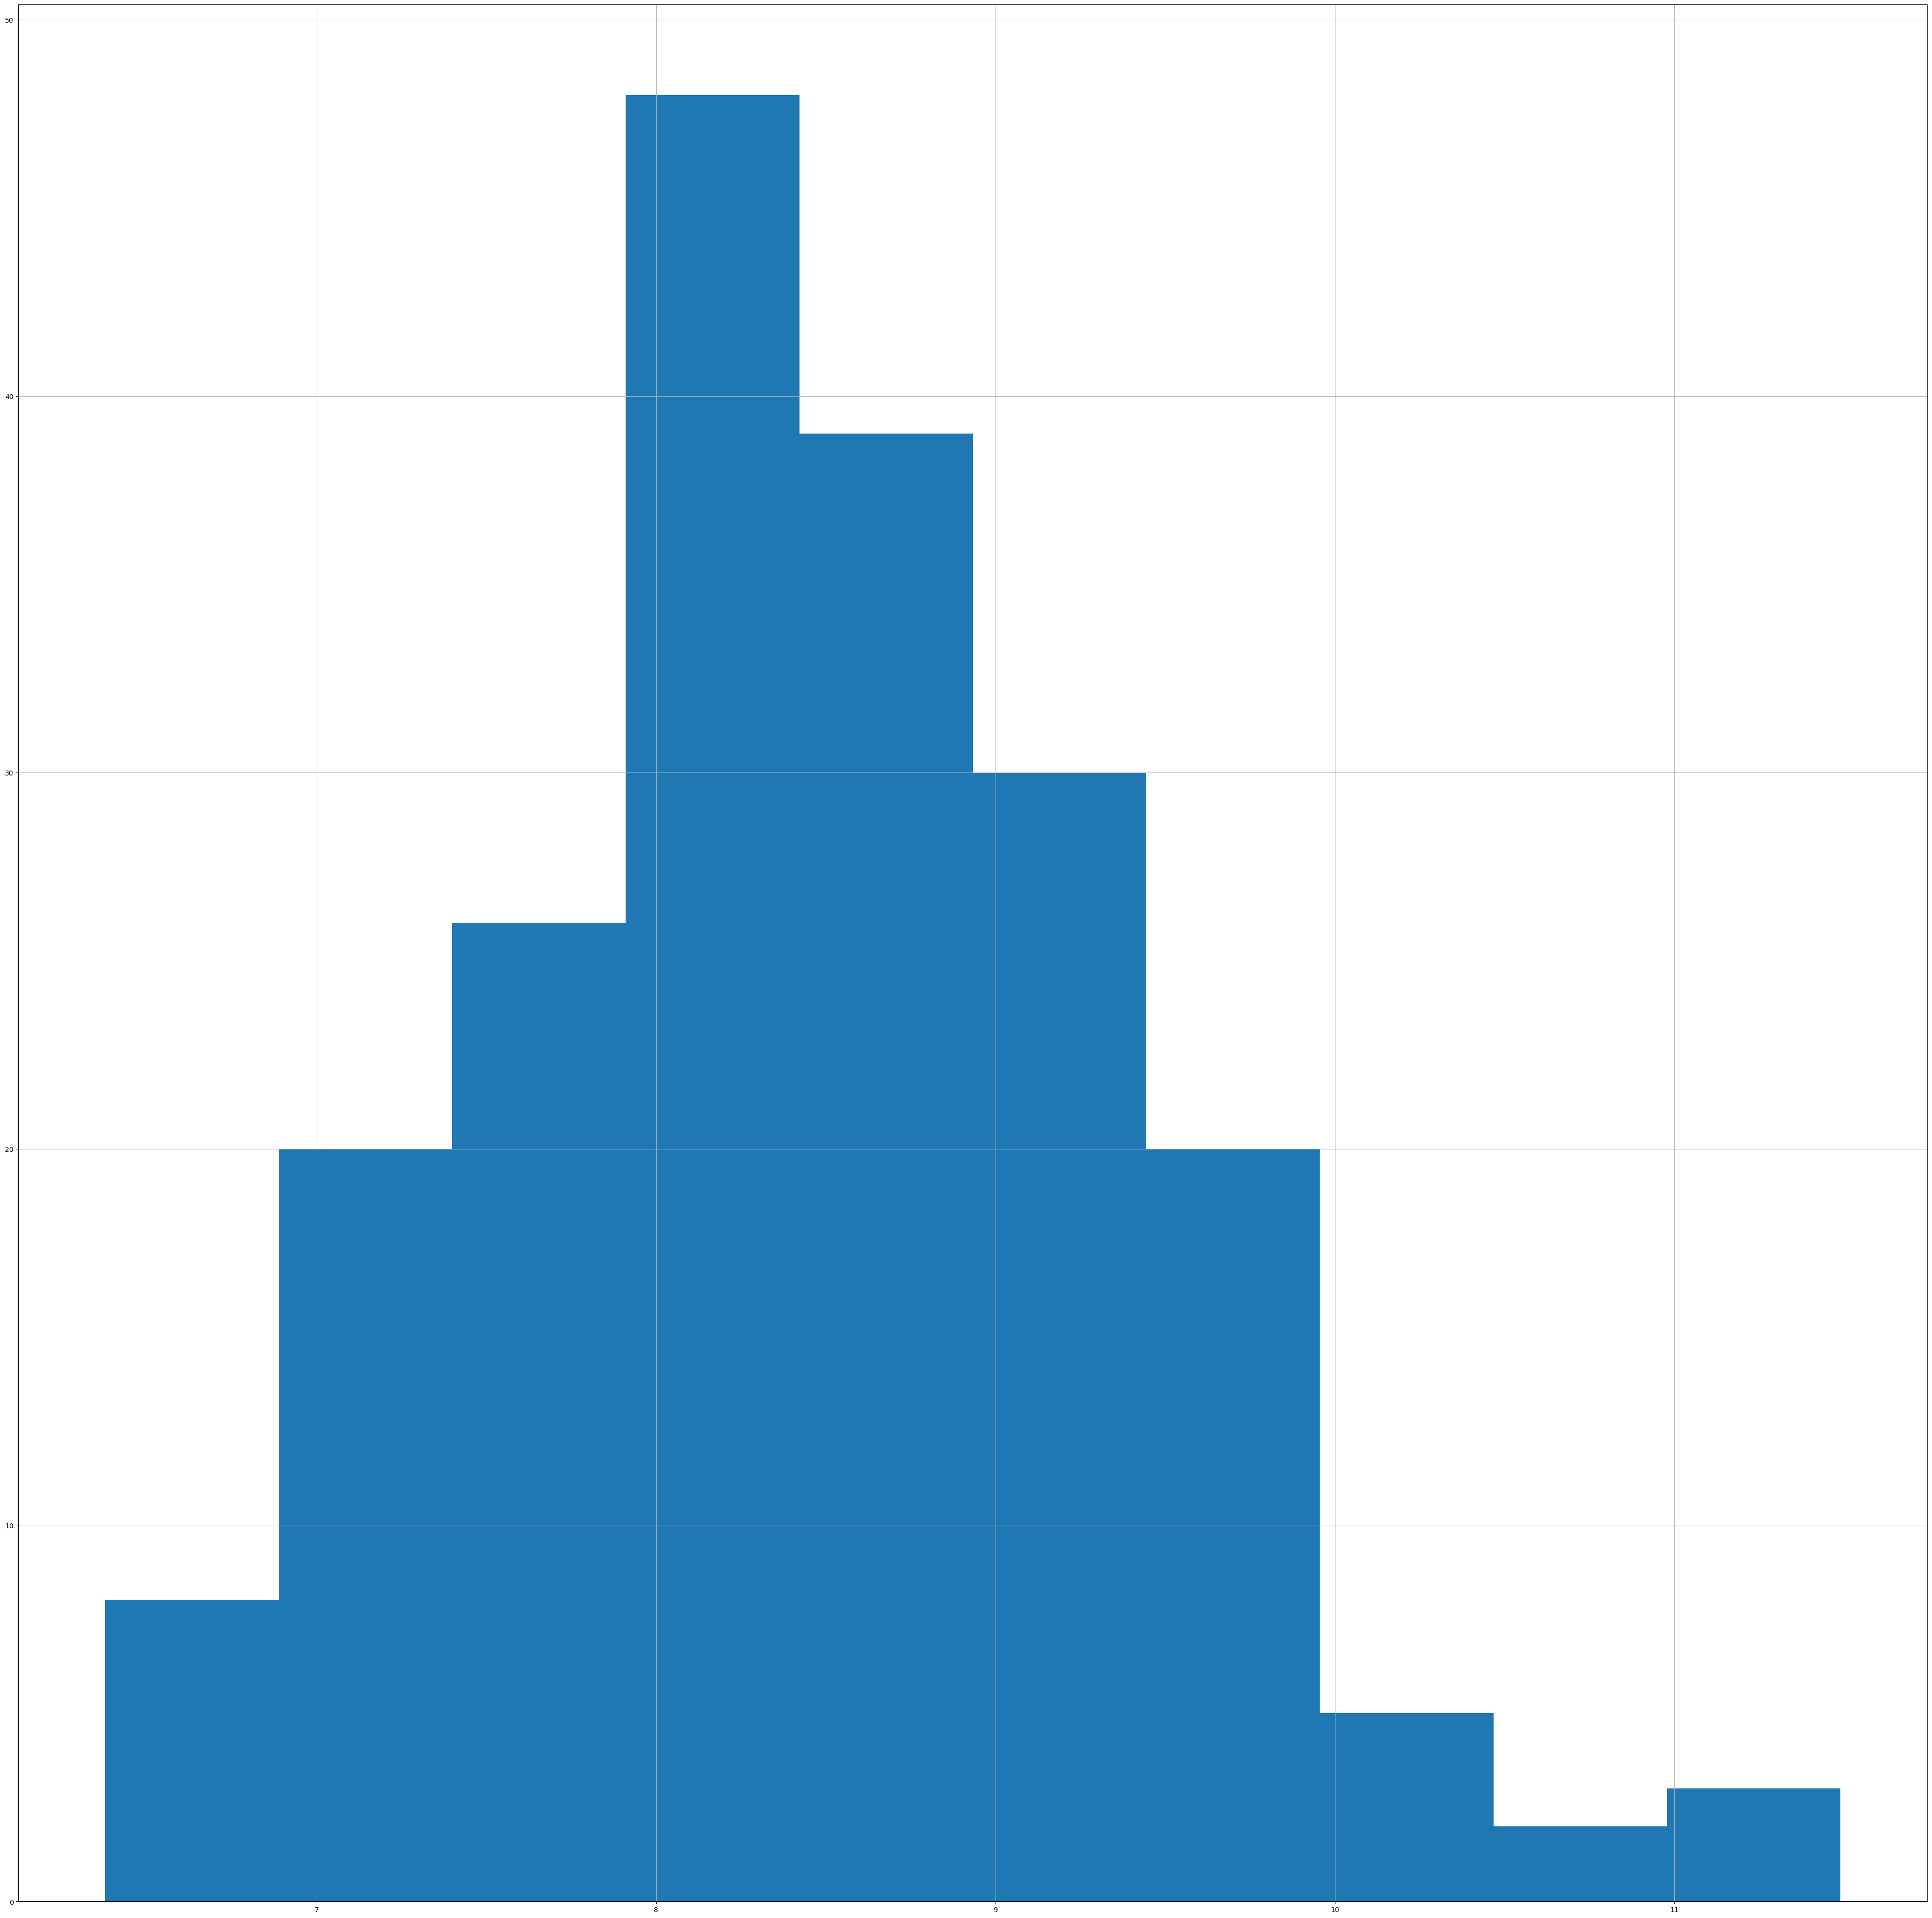

In [76]:
minidb=db[['geo_plz','totalRent_per_sqm','date']]
plz=db['geo_plz'].unique()
minidb2=minidb.groupby('date')
minidb_plz=minidb[minidb['date']=='May19']
minidb_plz[minidb_plz['geo_plz']==plz[30]]['totalRent_per_sqm'].hist()
#Gotta clean all the plz with less than 50 data points in any time and plz.

In [68]:
plz[[10,20,30]]

array([44229, 38118,  1705])

In order to see the full map in vector format, feel free to enter [my Google Drive folder](https://drive.google.com/drive/folders/1OejsL2djv4bDr4JgxlePzff90hW9tEQx?usp=sharing) and download the final plot.

Credit for the shapefile:
https://www.suche-postleitzahl.org/

**PS: This is a work in progress.**👷
Further documentation and plots coming soon! 